<a href="https://colab.research.google.com/github/antonellafontanetto/DataScience/blob/main/Notebook_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science

Un proyecto de data science tiene varias etapas:

1. Recolección de Datos
2. Exploración y Procesamiento de los datos
3. Modelado
4. Puesta en Producción

Si bien la recoleccion de los datos es uno de los pasos más importante de cualquier proyecto, el Data Scientist puede tener desde mucho hasta nada de control en esta etapa. Muy frecuentemente, los data scientist tienen que trabajar con datos guardados en archivos excel, o csv que proveen los clientes.

De cualquier manera, poder leer estos datos, organizarlos, darles el formato correcto, inspeccionarlos y manipularlos es una tarea escencial y requiere librerias especiales, que veremos a lo largo de esta Notebook.

<font size=5>  👩🏽‍🔬 Exploración de los datos 👩🏽‍💻</font>

Una de las primeras cosas que debe realizar un Data Scientist al iniciar un nuevo proyecto es conocer el dataset con el cual va a trabajar. Este paso se conoce como <font color='#1ABC9C'>_"Analisis exploratorio de datos"_</font>.

Este análisis, que es parte de nuestra etapa de exploración y procesamiento de los datos, es muy importante ya que nos permitira descubrir patrones presentes en los datos. También permitira ver aquellos datos que se alejen del comportamiento esperado.

Cuando uno inicia un proyecto de Data Science el primer impulso es saltar a ajustar un modelo de machine learning. Sin embargo, es muy probable que no podamos explicar sus resultados, o no podamos entender que debemos ajustar si no hemos realizado previamente un analisis exploratorio.

Por este motivo, nos abocaremos a explorar nuestros datos en esta Notebook.

## Primera Parte: Describiendo los datos

Imaginemos la siguiente situación: Trabajas como data scientist en una empresa que comercializa distintos productos. La empresa tiene datos de ventas del Black Friday del año pasado. Tu Team leader te provee el dataset en el archivo `blackfriday.csv` y te pide que pienses en que proyecto puede surgir de allí que tenga utilidad para la empresa.

In [ ]:
#importa pandas
import pandas as pd
import numpy as np

Recordemos que la sintaxis para poder leer un archivo csv es:
    
`df = pd.read_csv('archivo.csv', delimiter=',')`

Aunque muchas veces se omite el `delimiter` si el archivo esta separado por comas.

Lee el archivo csv `bkackfriday.csv` usando `pandas`. Guardalo en una variable llamada `blackfriday`.

In [ ]:
blackfriday = pd.read_csv('/content/blackfriday.csv')


Visualiza el DataFrame y observa cuantas filas y columnas tiene.

In [ ]:
blackfriday.head() #la función head trae las primeras 5 filas

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,15.0,10.0,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
blackfriday.shape #la función shape permite ver cuantas filas y columnas tiene el dataset

(537577, 12)

Nombre y tipo de datos en las columnas contenidas en `blackfriday`

In [ ]:
blackfriday.columns #columns trae el nombre de las columnas del dataset en formato de lista

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
blackfriday.dtypes #dtypes permite ver el formato de las variables de cada columna del dataset

,0
User_ID,int64
Product_ID,object
Gender,object
Age,float64
Occupation,float64
City_Category,object
Stay_In_Current_City_Years,int64
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


Chequea si tiene valores faltantes y ver las filas que los tienen.

In [ ]:
blackfriday.isna().sum() #la función isna().sum() permite ver la suma de los valores faltantes por cada columna

,0
User_ID,0
Product_ID,0
Gender,53758
Age,26879
Occupation,80637
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,166986


In [ ]:
blackfriday[blackfriday.isna().any(axis=1)] #este caso es una máscara/filtrado donde pido ver las filas que tienen al menos un valor faltante

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,14.0,10.0,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,15.0,NaN,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,NaN,15.0,10.0,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,15.0,10.0,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,60.0,16.0,C,4,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
537570,1004736,P00162442,M,22.0,NaN,A,1,1,1,16.0,NaN,15491.0
537572,1004737,P00193542,M,43.0,16.0,C,1,0,1,2.0,NaN,11664.0
537574,1004737,P00345942,M,41.0,16.0,C,1,0,8,15.0,NaN,8043.0
537575,1004737,P00285842,M,38.0,16.0,C,1,0,5,NaN,NaN,7172.0


In [ ]:
blackfriday[blackfriday['Gender'].isna()] #en este caso se aplico una máscara para la columna género, ver aquellas filas donde hay valor faltante

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
2,1000001,P00087842,NaN,15.0,10.0,A,2,0,12,NaN,NaN,1422.0
24,1000008,P00303442,NaN,26.0,12.0,C,4,1,1,8.0,14.0,11927.0
38,1000010,P00155442,NaN,39.0,NaN,B,4,1,1,11.0,15.0,15212.0
40,1000010,P00087242,NaN,40.0,1.0,B,4,1,14,NaN,NaN,7947.0
42,1000010,P00259342,NaN,41.0,1.0,B,4,1,5,9.0,NaN,8718.0
...,...,...,...,...,...,...,...,...,...,...,...,...
537533,1004732,P00209842,NaN,29.0,NaN,B,2,1,5,8.0,NaN,6978.0
537543,1004732,P00117242,NaN,29.0,NaN,B,2,1,8,17.0,NaN,7802.0
537549,1004734,P00345842,NaN,53.0,1.0,B,1,1,2,8.0,14.0,13082.0
537550,1004735,P00278242,NaN,47.0,3.0,C,3,0,1,NaN,NaN,11658.0


Detalles estadisticos de cada columna:

In [ ]:
blackfriday.describe() #aplica función describe sobre el dataset para poder ver las estadísticas descriptivas

,User_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,510698.000000,456940.000000,537577.000000,537577.000000,537577.000000,370591.000000,164278.000000,526825.000000
mean,1.002992e+06,34.321239,8.083580,1.859458,0.408797,5.295546,9.842144,12.669840,9334.416408
std,1.714393e+03,11.640546,6.523685,1.289828,0.491612,3.750701,5.087259,4.124341,4980.922156
min,1.000001e+06,14.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,26.000000,2.000000,1.000000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,32.000000,7.000000,2.000000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,42.000000,14.000000,3.000000,1.000000,8.000000,15.000000,16.000000,12074.000000
max,1.006040e+06,74.000000,20.000000,4.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


Podemos ver tambien que valores o categorias estan incluidas en las columnas:

In [ ]:
blackfriday["City_Category"].value_counts() #con value_counts() puedo contar las variables para la columna City_Category

,count
City_Category,
B,226493
C,166446
A,144638


In [ ]:
blackfriday["City_Category"].value_counts(normalize=True) #value_counts(normalize=True) puedo visualizar las proporciones por categoría

,proportion
City_Category,
B,0.421322
C,0.309623
A,0.269055


In [ ]:
blackfriday["Marital_Status"].value_counts(normalize=True)

,proportion
Marital_Status,
0,0.591203
1,0.408797


In [ ]:
blackfriday['Stay_In_Current_City_Years'].unique() #devuelve un array con los valores únicos presentes en una columna

array([2, 4, 3, 1, 0])

In [ ]:
blackfriday['Stay_In_Current_City_Years'].value_counts()

,count
Stay_In_Current_City_Years,
1,189192
2,99459
3,93312
4,82889
0,72725


In [ ]:
blackfriday['Stay_In_Current_City_Years'] = blackfriday['Stay_In_Current_City_Years'].str.replace('4+', '4', regex=False).astype(int)

AttributeError: Can only use .str accessor with string values!

In [ ]:
blackfriday[(blackfriday["City_Category"] == 'A') & (blackfriday["Marital_Status"] == 0)]["Purchase"].max()


23958.0

In [ ]:
blackfriday[(blackfriday["City_Category"] == 'A') & (blackfriday["Marital_Status"] == 0)]["Purchase"].min()


185.0

In [ ]:
blackfriday[(blackfriday["Gender"] == 'F') & (blackfriday["Marital_Status"] == 0)]["Purchase"].max()


23950.0

In [ ]:
blackfriday.groupby(by=['City_Category', 'Gender'])['Purchase'].mean()

City_Category  Gender
A              F          8636.497553
               M          9061.146295
B              F          8592.777069
               M          9393.940119
C              F          9259.441144
               M         10033.803481
Name: Purchase, dtype: float64

In [ ]:
pd.crosstab(blackfriday["City_Category"], blackfriday["Product_Category_1"]) #es una función que crea tablas de contingencia o tablas cruzadas. Estas tablas permiten analizar la relación entre dos o más variables categoricas, mostrando la distribución conjunta de sus valores

Product_Category_1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
City_Category,,,,,,,,,,,,,,,,,,
A,34553,6045,4829,2996,41491,5420,1210,31688,109,1307,6517,1043,1585,474,1698,2810,120,743
B,57417,10274,8448,5151,63162,8407,1580,46801,172,2028,10339,1648,2226,622,2597,3987,263,1371
C,46383,7180,6572,3420,43939,6337,878,33643,123,1697,7104,1184,1629,404,1908,2900,184,961


## Parte 2: ¿Cómo visualizo mis datos?

Para poder visualizar los datos y la relación entre las distintas variables, podemos usar dos librerias: `matplotlib` y `seaborn`.

Documentación:
- [matplotlib](https://matplotlib.org/3.1.1/contents.html)
- [seaborn](https://seaborn.pydata.org/)

- Importamos la libreria `matplotlib.pyplot` como `plt`
- Importamos la libreria seaborn como `sns`

In [ ]:
#Importa las librerias matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Veamos algunos ejemplos de distintos graficos que se pueden obtener con estas librerias.

In [ ]:
blackfriday.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,float64
Occupation,float64
City_Category,object
Stay_In_Current_City_Years,int64
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


#### Histogramas:

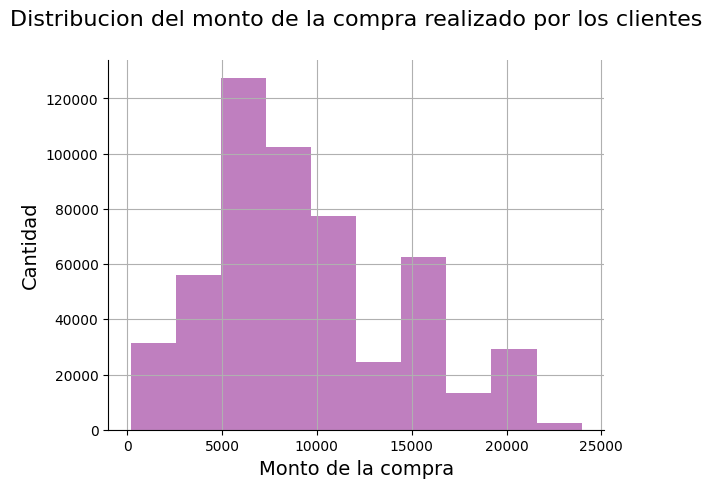

In [ ]:
# Grafico Age
plt.figure()
plt.hist(blackfriday['Purchase'].dropna(), bins=10, color="purple", alpha=0.5)
plt.ylabel("Cantidad", size=14)
plt.xlabel("Monto de la compra", size=14)
plt.title("Distribucion del monto de la compra realizado por los clientes", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(True)
plt.show()

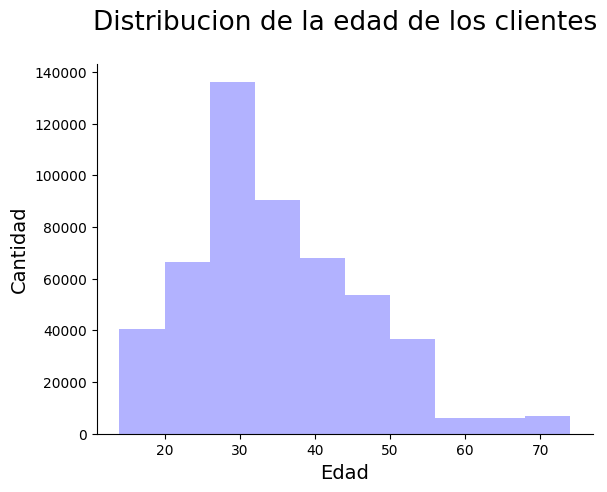

In [ ]:
# Grafico Age
plt.figure()
plt.hist(blackfriday['Age'].dropna(), bins=10, color="blue", alpha=0.3)
plt.ylabel("Cantidad", size=14)
plt.xlabel("Edad", size=14)
plt.title("Distribucion de la edad de los clientes", size=19, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

Mi pagina favorita para elegir [colores](https://htmlcolorcodes.com/es/tabla-de-colores/)🎨 &nbsp;🖍

#### Distplot:

<Figure size 640x480 with 0 Axes>

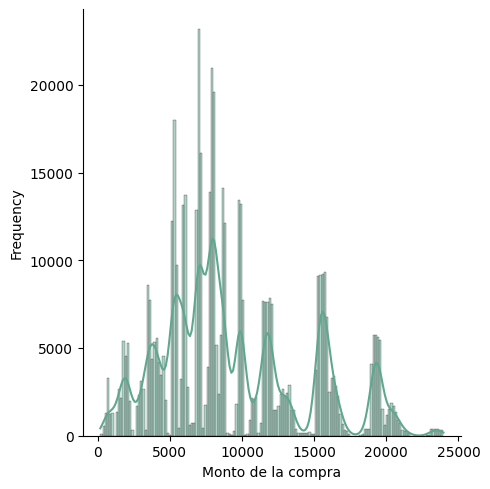

In [ ]:
plt.figure()
sns.displot(blackfriday["Purchase"], color="#5ea88e", kde=True)
plt.xlabel('Monto de la compra')
plt.ylabel('Frequency')
sns.despine()
plt.show()

#### Boxplot:

In [ ]:
boxplot_blackfriday = blackfriday.melt(id_vars='City_Category', value_vars=['Purchase'])

In [ ]:
boxplot_blackfriday.head()

,City_Category,variable,value
0,A,Purchase,8370.0
1,A,Purchase,15200.0
2,A,Purchase,1422.0
3,A,Purchase,1057.0
4,C,Purchase,7969.0


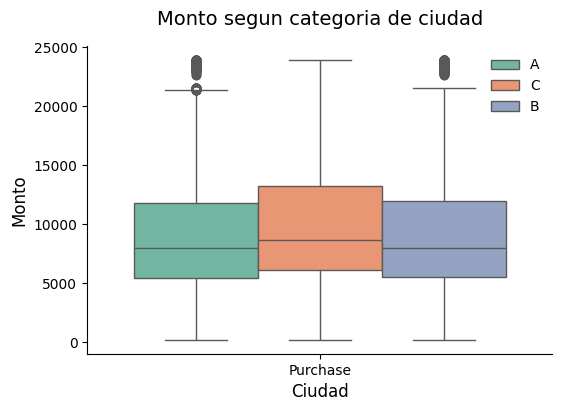

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="variable", y="value", data=boxplot_blackfriday, palette="Set2", hue='City_Category')

plt.title('Monto segun categoria de ciudad', size=14, pad=15)
plt.legend(loc='best', frameon=False)
plt.xlabel('Ciudad', size=12)
plt.ylabel('Monto', size=12)
sns.despine()
plt.show()

#### Scaterplot:

<ipython-input-64-c1b6a97bd69d>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="Age", y="Purchase",data=blackfriday, palette="spring")


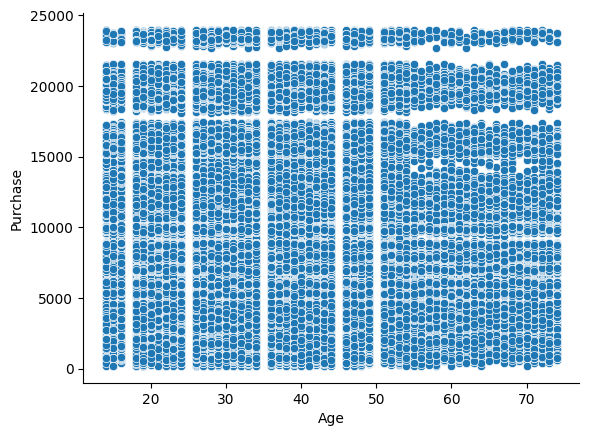

In [64]:
plt.figure()
sns.scatterplot(x="Age", y="Purchase",data=blackfriday, palette="spring")
sns.despine()
plt.show();

#### Countplot

Observa como se pueden ajustar la estetica del grafico (Vale para cualquier grafico).

<ipython-input-65-0428bfeb6525>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Occupation", data=blackfriday.sort_values('Occupation'), palette="Set3")


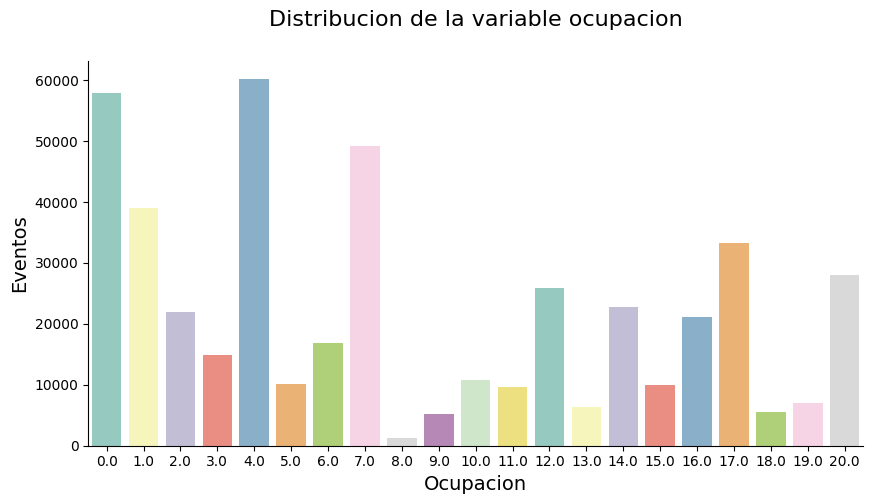

In [65]:
plt.figure(figsize=(10,5))


sns.countplot(x="Occupation", data=blackfriday.sort_values('Occupation'), palette="Set3")

plt.ylabel("Eventos", size=14)
plt.xlabel("Ocupacion", size=14)
plt.title("Distribucion de la variable ocupacion", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

<ipython-input-66-83a0a9d0502b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=blackfriday, palette="Set3")


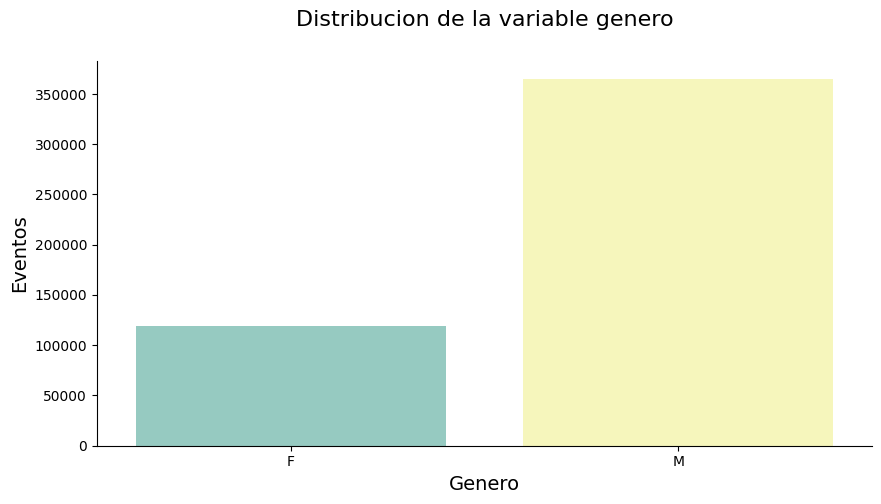

In [66]:
plt.figure(figsize=(10,5))


sns.countplot(x="Gender", data=blackfriday, palette="Set3")

plt.ylabel("Eventos", size=14)
plt.xlabel("Genero", size=14)
plt.title("Distribucion de la variable genero", size=16, pad=25)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(False)
plt.show()

#### Graficos solapados

<Figure size 640x480 with 0 Axes>

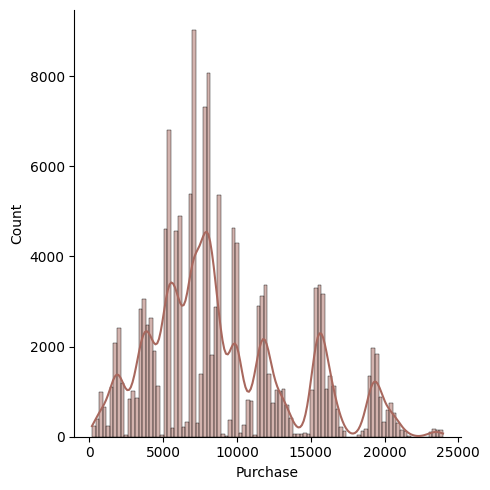

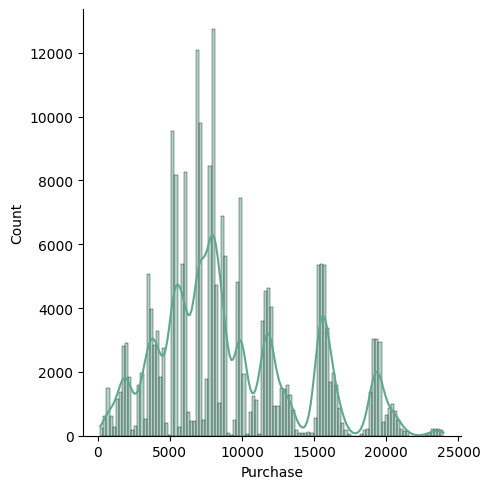

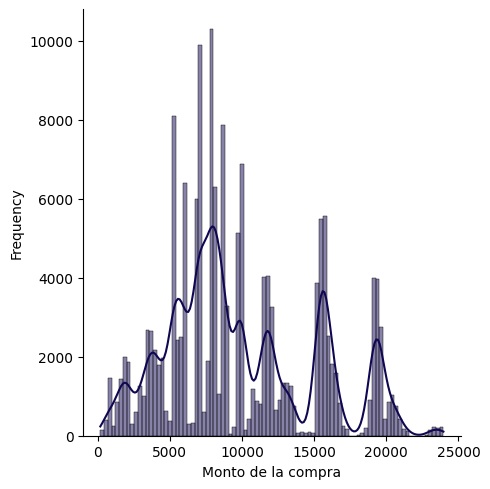

In [67]:
plt.figure()
sns.displot(blackfriday[blackfriday['City_Category'] == 'A']["Purchase"], color="#a8685e", kde=True)
sns.displot(blackfriday[blackfriday['City_Category'] == 'B']["Purchase"], color="#5ea88e", kde=True)
sns.displot(blackfriday[blackfriday['City_Category'] == 'C']["Purchase"], color="#0f0752", kde=True)
plt.xlabel('Monto de la compra')
plt.ylabel('Frequency')
sns.despine()
plt.show();

#### Subplots

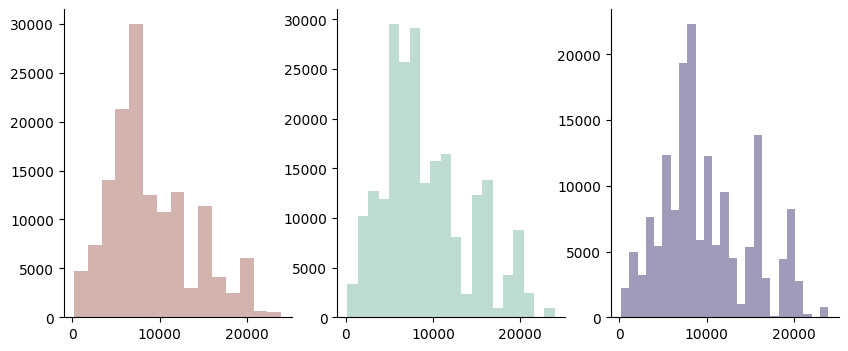

In [68]:
# Inicio subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
# Establezco colores
colors = np.arange(959)
# primer grafico
ax[0].hist(blackfriday[blackfriday['City_Category'] == 'A']["Purchase"], color="#a8685e", alpha=0.5, bins=15)
# segundo grafico
ax[1].hist(blackfriday[blackfriday['City_Category'] == 'B']["Purchase"], color="#5ea88e", alpha=0.4, bins=20)
# tercer grafico
ax[2].hist(blackfriday[blackfriday['City_Category'] == 'C']["Purchase"], color="#0f0752", alpha=0.4,  bins=25)
# modifico primer grafico
ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
# modifico segundo grafico
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
# modifico tercer grafico
ax[2].spines["top"].set_visible(False)
ax[2].spines["right"].set_visible(False)
plt.show()

#### Pairplot

In [69]:
blackfriday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [73]:
sns.pairplot(blackfriday[['Stay_In_Current_City_Years', 'Age', 'Purchase', 'Gender']], hue='Gender', palette='PuRd');

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7d11e202c360> (for post_execute):


KeyboardInterrupt: 

In [71]:
corr = blackfriday[['Age', 'Stay_In_Current_City_Years', 'Purchase']].corr(method = 'pearson')

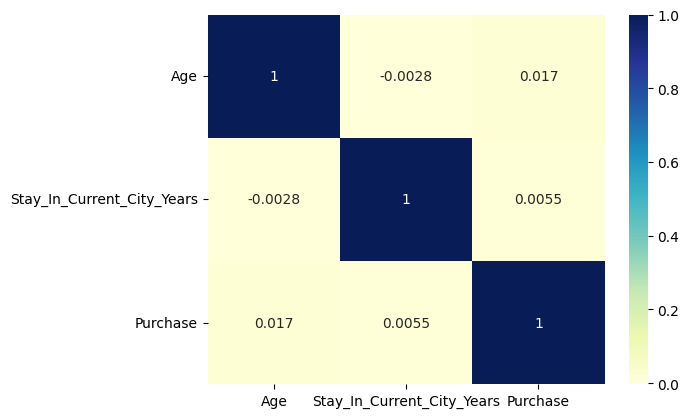

In [72]:
sns.heatmap(corr, cmap='YlGnBu', annot=True);

**Otros ejemplos de gráficos**: [Ejemplos en Matplotlib](https://matplotlib.org/3.1.0/gallery/index.html) y [Ejemplos en Seaborn](https://seaborn.pydata.org/examples/index.html)